# Analyse du Comportement des Utilisateurs dans le Commerce Électronique

## Mohamed DIALLO
## Master Data Science

# I. Introduction
## 1. Contexte

À l'ère du commerce électronique en constante évolution, la compréhension approfondie du comportement des consommateurs est cruciale pour les entreprises cherchant à optimiser leur offre de produits, à personnaliser l'expérience utilisateur, et à développer des stratégies marketing ciblées. Dans cette perspective, l'exploitation des données massives devient une stratégie incontournable pour les entreprises souhaitant rester compétitives et anticiper les tendances du marché.

## 2. Objectifs de l'étude

Notre étude se focalise sur l'exploration approfondie du jeu de données "E-commerce Sales Data" provenant de Kaggle. L'objectif principal est d'analyser les profils des utilisateurs, les détails produits, ainsi que les interactions entre ces deux entités afin de dégager des insights significatifs. Nous aspirons à déployer des techniques avancées de science des données pour comprendre les habitudes d'achat, créer des systèmes de recommandation pertinents, et informer les stratégies de marketing.
## 3. Portée et Limites

Cette étude se concentre sur l'utilisation de données provenant du domaine du commerce électronique pour extraire des connaissances exploitables. Cependant, il est important de souligner que les résultats obtenus dépendent de la qualité et de la représentativité des données fournies par le jeu de données. Les limites résident également dans la nature spécifique de chaque projet, lesquels peuvent varier en fonction du contexte et des données disponibles.
## 4. Collecte des Données

Notre jeu de données provient de Kaggle et offre une perspective complète des profils des utilisateurs, des détails produits, et des interactions entre ces deux entités sur une plateforme de commerce électronique.

En suivant, nous détaillerons les différentes feuilles du jeu de données, mettant en lumière leurs caractéristiques spécifiques, et explorerons les cas d'utilisation potentiels pour cette riche source d'informations.

# II. Sources de données

## 1. Descriptions des ensembles de données 

Le jeu de données E-commerce Sales Data fournit une collection complète d'informations relatives aux profils des utilisateurs, aux détails des produits et aux interactions entre les utilisateurs et les produits. 
Il s'agit d'une ressource précieuse pour comprendre le comportement des clients, leurs préférences et les tendances d'achat sur une plateforme de commerce électronique.

## 2. Structure du jeu de données :

- **Feuille d'utilisateur :** 
Cette feuille contient les profils des utilisateurs, y compris des détails tels que l'identifiant, le nom, l'âge, la localisation et d'autres informations pertinentes. Elle permet de comprendre les données démographiques et les caractéristiques des utilisateurs de la plateforme.


- **Fiche produit :** 
La fiche produit donne un aperçu des différents produits disponibles sur la plateforme de commerce électronique. Elle comprend les identifiants, les noms, les catégories, les prix, les descriptions et d'autres attributs spécifiques aux produits.


- **Fiche d'interactions :** 
La feuille d'interactions est un élément essentiel de l'ensemble de données, car elle capture les interactions entre les utilisateurs et les produits. Elle enregistre les détails des actions des utilisateurs, telles que les vues de produits, les achats, les avis et les évaluations. Ces données sont essentielles pour construire des systèmes de recommandation et comprendre les préférences des utilisateurs.


## 3. Cas d'utilisation potentiels :

- **Systèmes de recommandation :** 
Grâce aux données d'interaction entre l'utilisateur et le produit, cet ensemble de données est idéal pour élaborer des systèmes de recommandation. Il permet de développer des recommandations de produits personnalisées afin d'améliorer l'expérience de l'utilisateur.

- **Analyse du panier de produits :** 
L'ensemble de données peut être utilisé pour l'analyse des paniers de marché afin de comprendre quels produits sont fréquemment achetés ensemble, ce qui facilite la gestion des stocks et le marketing ciblé.

- **Analyse du comportement des utilisateurs :** 
En analysant les interactions des utilisateurs, vous pouvez obtenir des informations sur leur comportement, notamment sur les catégories de produits les plus populaires, les habitudes de navigation et l'impact des avis et évaluations des utilisateurs sur les décisions d'achat.

- **Marketing ciblé :** 
L'ensemble de données peut éclairer les stratégies de marketing, permettant aux entreprises d'adapter les promotions et les publicités à des segments d'utilisateurs et à des catégories de produits spécifiques.

## III. Exploration et compréhension des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import normalize

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, f1_score

## 1. Détails sur les clients

In [2]:
customers = pd.read_csv("data/customers_details.csv")
locations = pd.read_csv("data/locations.csv")

In [3]:
display(customers.head())

display(locations.head())

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


,Location,Latitude,Longitude
0,Kentucky,37.8223,-85.7682
1,Maine,45.2538,-69.4455
2,Massachusetts,42.3736,-71.1097
3,Rhode Island,41.6762,-71.5562
4,Oregon,43.8041,-120.5542


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
print("\nMissing Values :")
print(customers.isnull().sum())

print("\nNaN Values :")
print(customers.isna().sum())

print("\nDuplicated Values :")
print(customers.duplicated().sum())



Missing Values :
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

NaN Values :
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Pay

In [6]:
customers.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


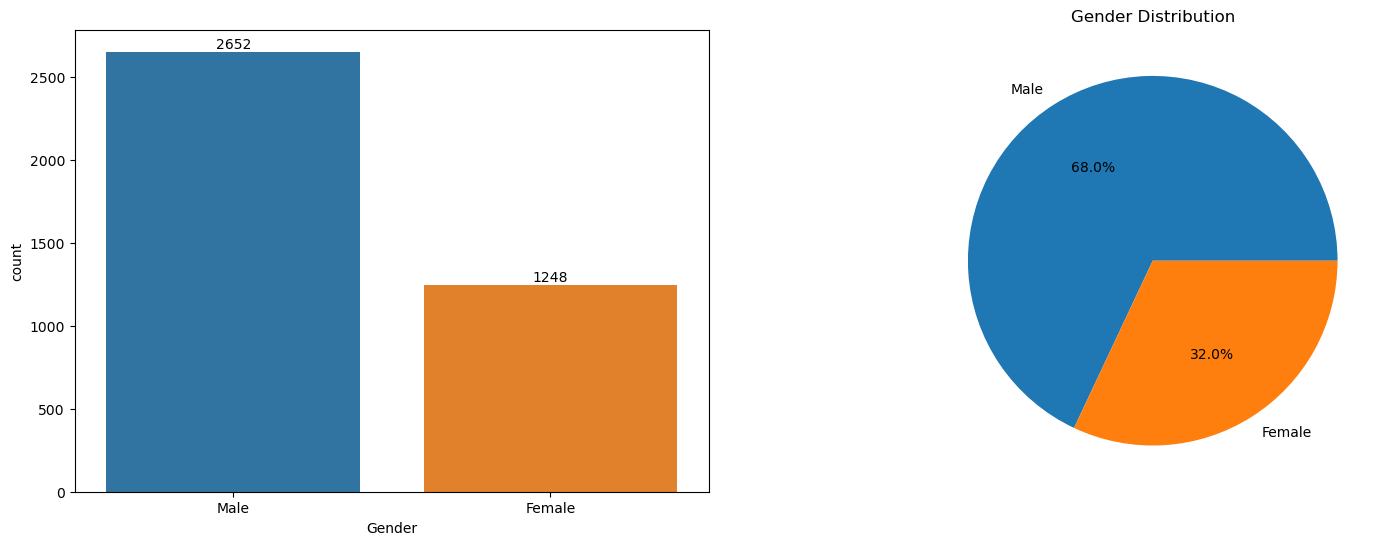

In [7]:
# Créer une figure avec deux sous-graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Premier sous-graphique : countplot avec seaborn
sn.countplot(data=customers, x='Gender', ax=axes[0])
for bars in axes[0].containers:
    axes[0].bar_label(bars)

# Deuxième sous-graphique : pie chart avec Matplotlib
gender_counts = customers['Gender'].value_counts()
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
axes[1].set_title('Gender Distribution')

# Afficher la figure
plt.show()

La première figure indique une disparité marquée entre les genres, avec **68%** de clients identifiés comme des Hommes et **32%** comme des Femme.

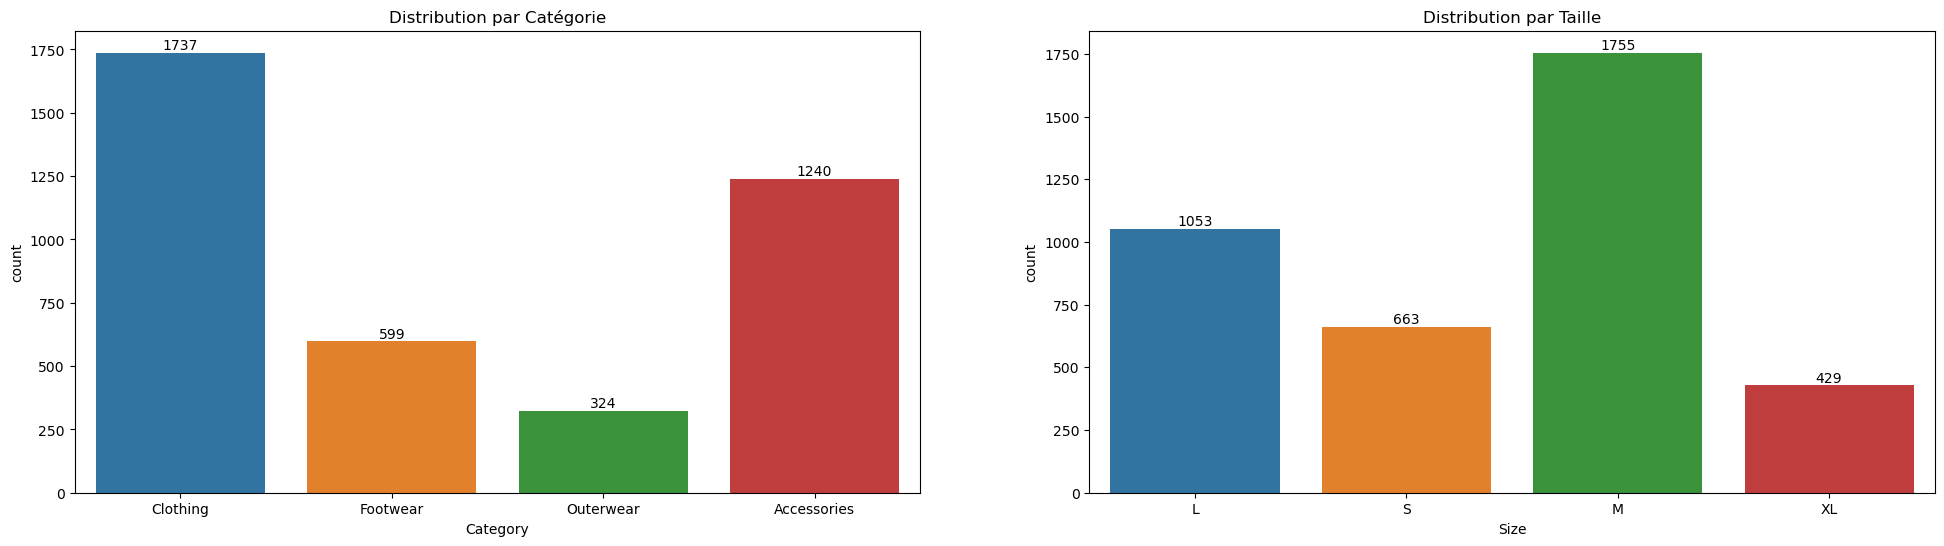

In [8]:
# Création de sous-graphiques avec deux colonnes
fig, axes = plt.subplots(1, 2, figsize=(24, 6))

# Premier sous-graphique : countplot pour 'Category'
ax1 = sn.countplot(data=customers, x='Category', ax=axes[0])
for bars in ax1.containers:
    ax1.bar_label(bars)
ax1.set_title('Distribution par Catégorie')

# Deuxième sous-graphique : countplot pour 'Size'
ax2 = sn.countplot(data=customers, x='Size', ax=axes[1])
for bars in ax2.containers:
    ax2.bar_label(bars)
ax2.set_title('Distribution par Taille')

# Afficher la figure
plt.show()


- La catégorie des vêtements est la plus importante parmi toutes les autres.
- Les produits de taille moyenne sont les plus vendus

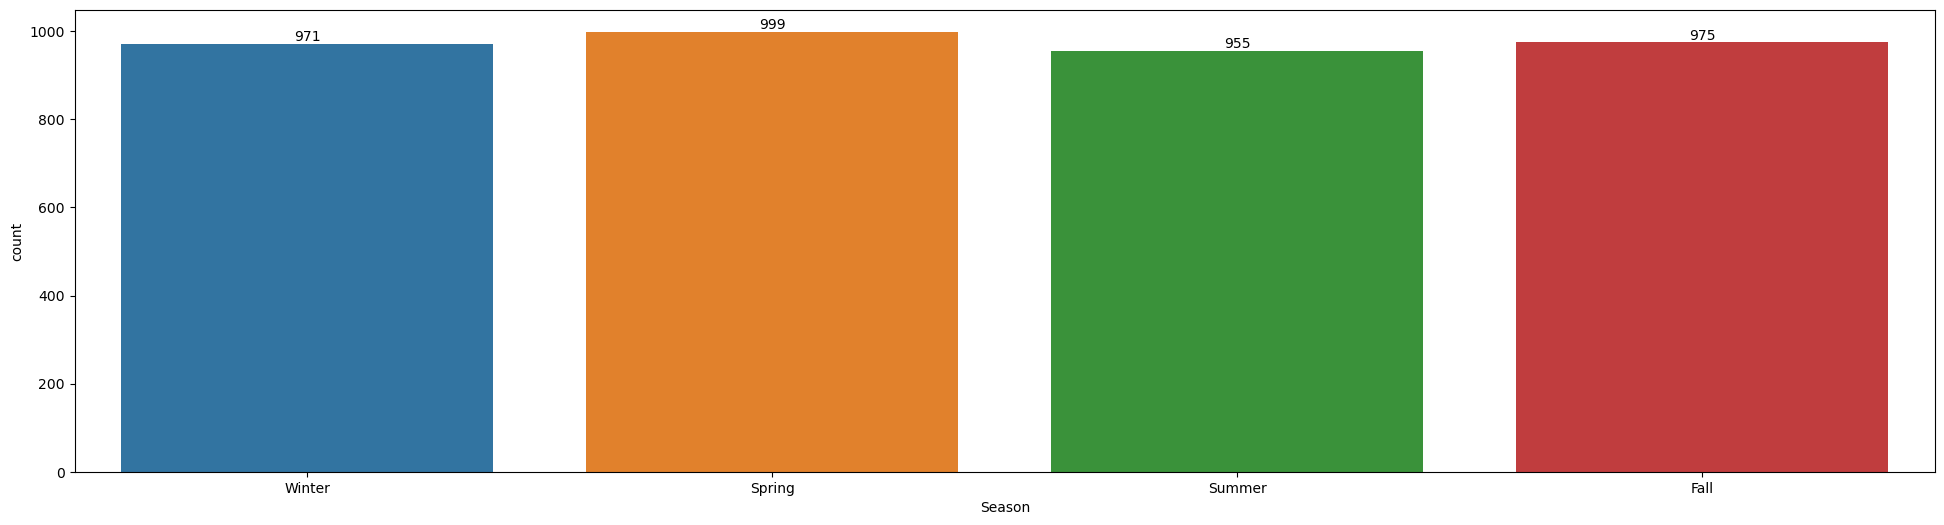

In [9]:
plt.figure(figsize=(24,6))
ax = sn.countplot(data=customers,x='Season')
for bars in ax.containers:
    ax.bar_label(bars)


Au printemps, à l'automne, en hiver et en été, les ventes sont les plus importantes.

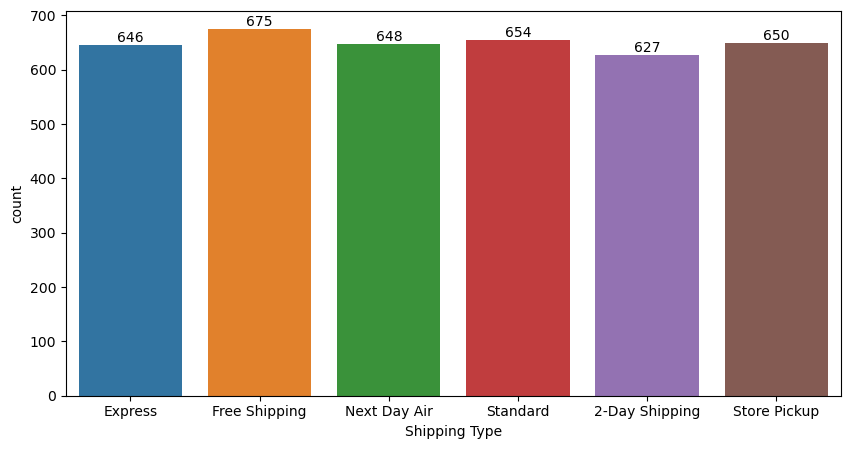

In [10]:
plt.figure(figsize=(10,5))
ax = sn.countplot(data=customers,x='Shipping Type')
for bars in ax.containers:
    ax.bar_label(bars)

La livraison gratuite a le plus grand nombre d'acheteurs

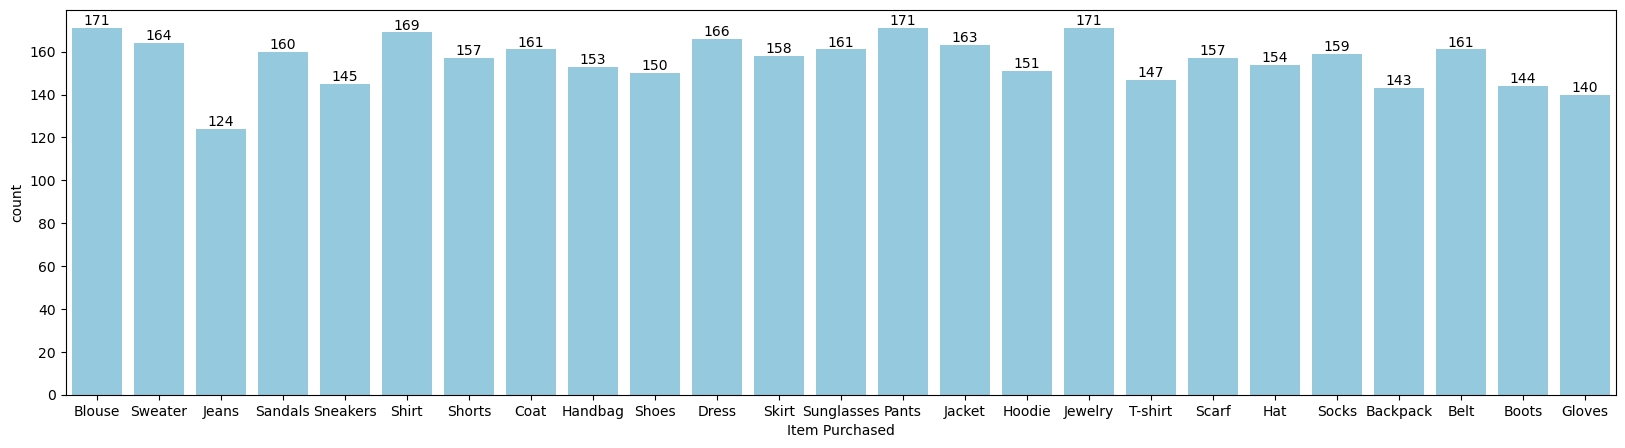

In [11]:
plt.figure(figsize=(20,5))
ax = sn.countplot(data=customers,x='Item Purchased', color='skyblue')
for bars in ax.containers:
    ax.bar_label(bars)


La plupart des ventes concernent les blouses, les pantalons et les bijoux.

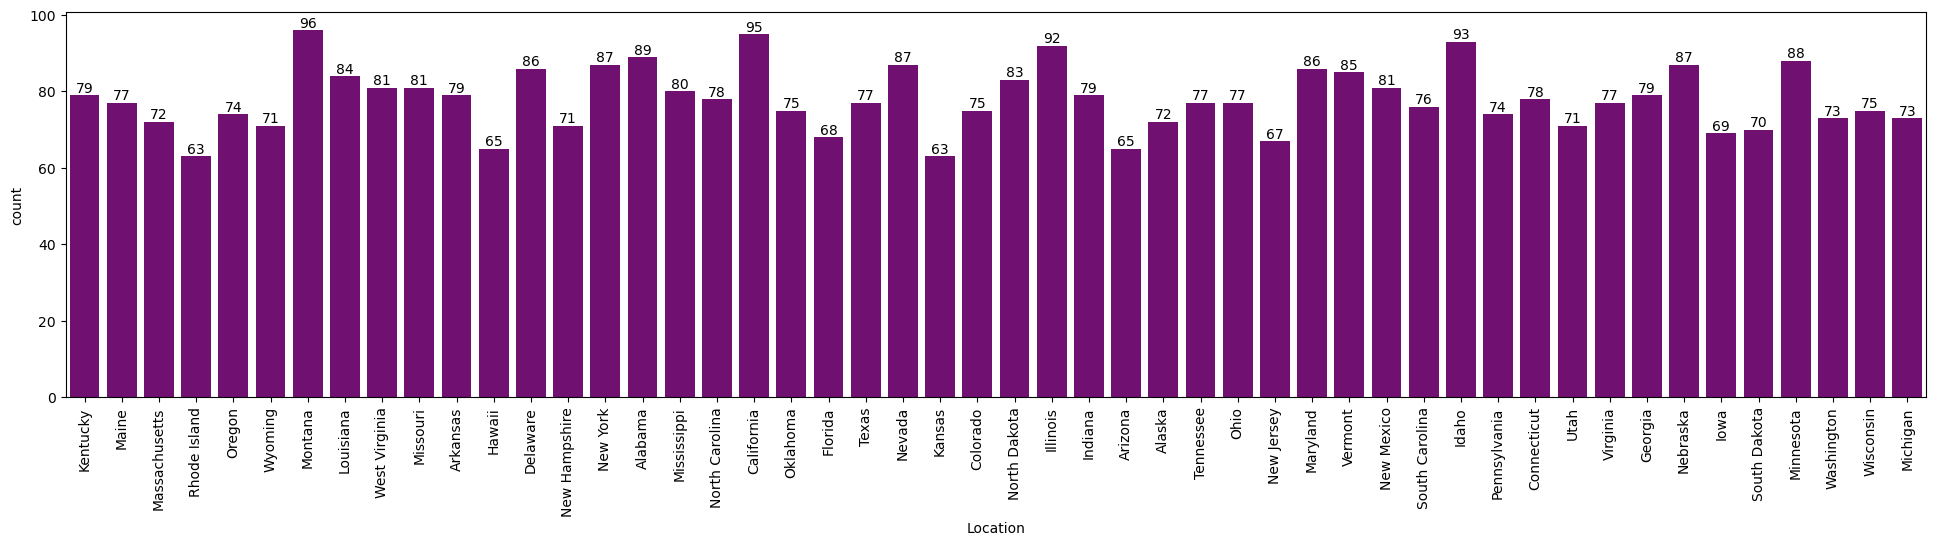

In [12]:
plt.figure(figsize=(24,5))
ax = sn.countplot(data=customers,x='Location', color='purple')
plt.xticks(rotation=90)
for bars in ax.containers:
    ax.bar_label(bars)

La plupart des acheteurs viennent du Montana, de la Californie et de l'Idaho.

## 2. Détails sur les produits

In [13]:
products = pd.read_csv("data/products_details.csv")

In [14]:
display(products.head(3))

,Uniqe Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,...,Product Url,Stock,Product Details,Dimensions,Color,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,$237.68,NaN,NaN,...,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,$99.95,NaN,55324,...,NaN,https://www.amazon.com/Electronic-Circuits-Cla...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$34.99,NaN,NaN,...,https://www.amazon.com/3Doodler-Plastic-Innova...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


In [15]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Uniqe Id               10002 non-null  object
 1   Product Name           10002 non-null  object
 2   Brand Name             4 non-null      object
 3   Asin                   1 non-null      object
 4   Category               9168 non-null   object
 5   Upc Ean Code           37 non-null     object
 6   List Price             1 non-null      object
 7   Selling Price          9891 non-null   object
 8   Quantity               6 non-null      object
 9   Model Number           8232 non-null   object
 10  About Product          9728 non-null   object
 11  Product Specification  8414 non-null   object
 12  Technical Details      9222 non-null   object
 13  Shipping Weight        8860 non-null   object
 14  Product Dimensions     652 non-null    object
 15  Image              

In [16]:
print("\nMissing Values :")
print(products.isnull().sum())

print("\nNaN Values :")
print(products.isna().sum())

print("\nDuplicated Values :")
print(products.duplicated().sum())


Missing Values :
Uniqe Id                     0
Product Name                 0
Brand Name                9998
Asin                     10001
Category                   834
Upc Ean Code              9965
List Price               10001
Selling Price              111
Quantity                  9996
Model Number              1770
About Product              274
Product Specification     1588
Technical Details          780
Shipping Weight           1142
Product Dimensions        9350
Image                      116
Variants                  7208
Sku                       9783
Product Url                487
Stock                     9554
Product Details           9937
Dimensions                9979
Color                     9982
Ingredients               9994
Direction To Use         10001
Is Amazon Seller           531
Size Quantity Variant     9573
Product Description       9945
dtype: int64

NaN Values :
Uniqe Id                     0
Product Name                 0
Brand Name               

### Commentaire :

- **Missing Values (Valeurs manquantes)** : 

Certaines colonnes ont un nombre important de valeurs manquantes. Par exemple, la colonne "Asin" a 10001 valeurs manquantes, la colonne "Brand Name" a 9998 valeurs manquantes, et d'autres colonnes ont également des valeurs manquantes.
Ces valeurs manquantes peuvent nécessiter une attention particulière lors de l'analyse ou du prétraitement des données.

- **NaN Values (Valeurs NaN) :**

Les valeurs manquantes et NaN semblent être présentes dans les mêmes colonnes, et les comptages sont cohérents entre les deux.
La colonne "Is Amazon Seller" a 531 valeurs manquantes, la colonne "Selling Price" a 111 valeurs manquantes, et d'autres colonnes ont également des valeurs manquantes.
Il pourrait être nécessaire de traiter ces valeurs manquantes en fonction du contexte et de l'objectif de l'analyse.

- **Duplicated Values (Valeurs dupliquées) :**

Il n'y a aucune valeur dupliquée dans la base de données, ce qui est une bonne indication de la qualité des données

## 3. Détails Activités

In [17]:
activities = pd.read_csv("data/customers_activities.csv")

In [18]:
display(activities.head())

,user id,product id,Interaction type,Time stamp,Unnamed: 4
0,1.0,4c69b61db1fc16e7013b43fc926e502d,purchase,10/10/2023 8:00,NaN
1,2.0,66d49bbed043f5be260fa9f7fbff5957,view,11/10/2023 8:00,NaN
2,3.0,2c55cae269aebf53838484b0d7dd931a,like,12/10/2023 8:00,NaN
3,4.0,18018b6bc416dab347b1b7db79994afa,view,13/10/2023 8:00,NaN
4,5.0,e04b990e95bf73bbe6a3fa09785d7cd0,like,14/10/2023 8:00,NaN


In [19]:
activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user id           2999 non-null   float64
 1   product id        2999 non-null   object 
 2   Interaction type  2871 non-null   object 
 3   Time stamp        2999 non-null   object 
 4   Unnamed: 4        0 non-null      float64
dtypes: float64(2), object(3)
memory usage: 128.8+ KB


In [20]:
print("\nMissing Values :")
print(activities.isnull().sum())

print("\nNaN Values :")
print(activities.isna().sum())

print("\nDuplicated Values :")
print(activities.duplicated().sum())


Missing Values :
user id              295
product id           295
Interaction type     423
Time stamp           295
Unnamed: 4          3294
dtype: int64

NaN Values :
user id              295
product id           295
Interaction type     423
Time stamp           295
Unnamed: 4          3294
dtype: int64

Duplicated Values :
294


### Commentaire :

- **Missing Values (Valeurs manquantes) :**

Plusieurs colonnes présentent des valeurs manquantes, notamment "user id", "product id", "Interaction type", et "Time stamp".
La colonne "Unnamed: 4" a un nombre significatif de valeurs manquantes (3294).
Vous devriez examiner la nature des valeurs manquantes dans ces colonnes et décider de la manière de les traiter, en fonction de l'objectif de votre analyse.

- **NaN Values :**

Les valeurs manquantes et NaN semblent être présentes dans les mêmes colonnes, et les comptages sont cohérents entre les deux.
La colonne "Unnamed: 4" a un nombre élevé de valeurs manquantes.

- **Duplicated Values (Valeurs dupliquées) :**

Il y a 294 valeurs dupliquées dans la base de données "activities".
Il serait judicieux d'examiner ces duplicatas pour déterminer s'ils sont légitimes ou s'ils doivent être traités.

In [21]:
# Afficher les valeurs dupliquées dans l'ensemble de données Sales Data
duplicated_rows = activities[activities.duplicated()]

print("Lignes dupliquées dans l'ensemble de données sur les activités :")
display(duplicated_rows.head())


Lignes dupliquées dans l'ensemble de données sur les activités :


,user id,product id,Interaction type,Time stamp,Unnamed: 4
3000,NaN,NaN,NaN,NaN,NaN
3001,NaN,NaN,NaN,NaN,NaN
3002,NaN,NaN,NaN,NaN,NaN
3003,NaN,NaN,NaN,NaN,NaN
3004,NaN,NaN,NaN,NaN,NaN


# IV. Nettoyage des données

## 1. Données Clients

In [22]:
customers_cleaned = customers.copy()  # Pour éviter de modifier le dataframe original

display(customers_cleaned.head())

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## 2. Données Activités

In [23]:
activites_cleaned = activities.copy()  # Pour éviter de modifier le dataframe original

# Supprimer la colonne 'Unnamed: 4'
activites_cleaned = activities.drop(columns=['Unnamed: 4'])

# Supprimer les lignes avec des valeurs manquantes dans les colonnes cruciales
activites_cleaned = activites_cleaned.dropna(subset=['user id', 'product id', 'Interaction type', 'Time stamp'])

# Supprimer les lignes en double
activites_cleaned = activites_cleaned.drop_duplicates()

# Convertir la colonne 'Time stamp' au format datetime
activites_cleaned['Time stamp'] = pd.to_datetime(activites_cleaned['Time stamp'], errors='coerce')

# Fractionner 'Time stamp' en 'Date' et 'Heure'
activites_cleaned['Date'] = activites_cleaned['Time stamp'].dt.date
activites_cleaned['Heure'] = activites_cleaned['Time stamp'].dt.time
activites_cleaned = activites_cleaned.drop(columns=['Time stamp'])


# Afficher le jeu de données nettoyé
print("\nJeu de données nettoyé :")
display(activites_cleaned.head())


Jeu de données nettoyé :


,user id,product id,Interaction type,Date,Heure
0,1.0,4c69b61db1fc16e7013b43fc926e502d,purchase,2023-10-10,08:00:00
1,2.0,66d49bbed043f5be260fa9f7fbff5957,view,2023-11-10,08:00:00
2,3.0,2c55cae269aebf53838484b0d7dd931a,like,2023-12-10,08:00:00
3,4.0,18018b6bc416dab347b1b7db79994afa,view,2023-10-13,08:00:00
4,5.0,e04b990e95bf73bbe6a3fa09785d7cd0,like,2023-10-14,08:00:00


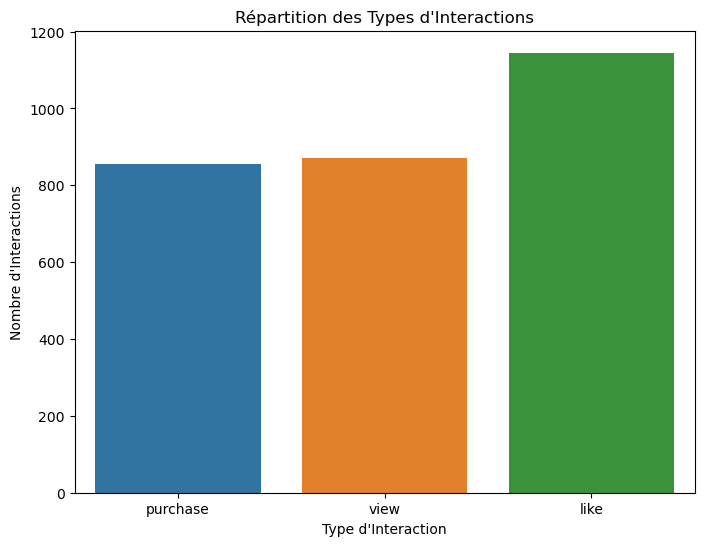

In [24]:
plt.figure(figsize=(8, 6))
sn.countplot(data=activites_cleaned, x='Interaction type')
plt.title('Répartition des Types d\'Interactions')
plt.xlabel('Type d\'Interaction')
plt.ylabel('Nombre d\'Interactions')
plt.show()

Cette visualisation permet de voir la distribution des différents types d'interactions (achat, vue, like)
Ici on peut voir que quand un produit est vue il est automatiquement acheté

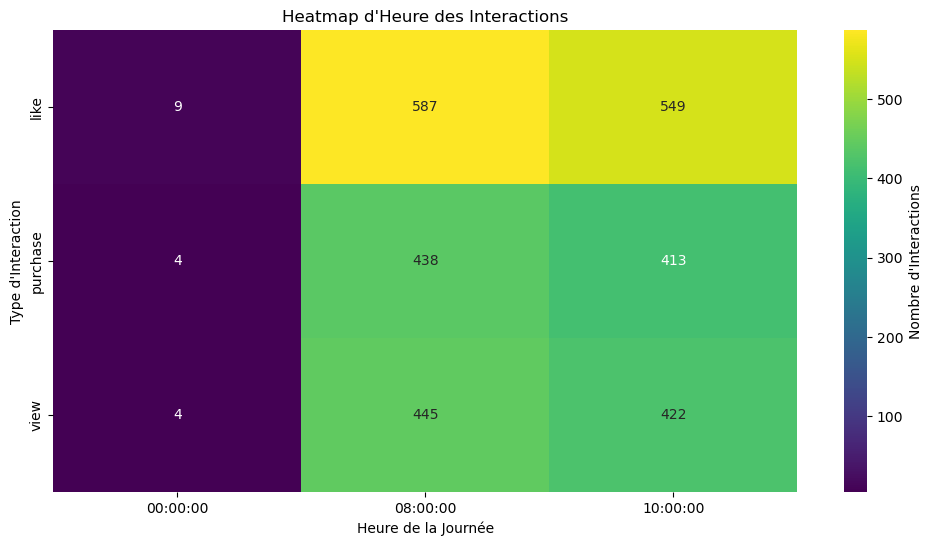

In [25]:
heatmap_data = activites_cleaned.pivot_table(index='Interaction type', columns='Heure', values='user id', aggfunc='count')

plt.figure(figsize=(12, 6))
sn.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Nombre d\'Interactions'})
plt.title('Heatmap d\'Heure des Interactions')
plt.xlabel('Heure de la Journée')
plt.ylabel('Type d\'Interaction')
plt.show()

Cette heatmap explore la distribution des interactions par heure de la journée. Elle peut révéler des tendances horaires spécifiques pour chaque type d'interaction.

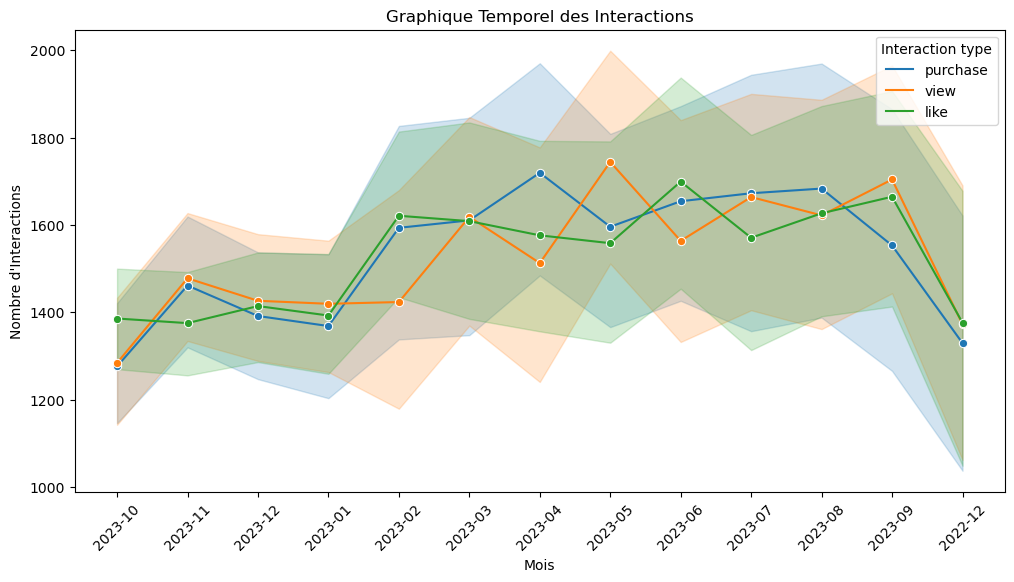

In [26]:
# Convertir la colonne 'Date' en format datetime
activites_cleaned['Date'] = pd.to_datetime(activites_cleaned['Date'])

# Extraire le mois à partir de la colonne 'Date' et le convertir en chaînes de caractères
activites_cleaned['Month'] = activites_cleaned['Date'].dt.to_period('M').astype(str)

# Créer un lineplot par mois pour chaque type d'interaction sur une seule figure
plt.figure(figsize=(12, 6))

sn.lineplot(data=activites_cleaned, x='Month', y='user id', hue='Interaction type', marker='o')
plt.title('Graphique Temporel des Interactions')
plt.xlabel('Mois')
plt.ylabel('Nombre d\'Interactions')
plt.xticks(rotation=45)
plt.show()


Ce graphique temporel illustre comment les interactions varient au fil du temps. Il peut révéler des tendances, des saisons d'activité accrue, ou des périodes de faible engagement.

## 3. Données Produits

Faison une figure qui vas nous permettre de reperer plus facilement le nombre de valeurs manquantes dans chaque variable.
Cela nous permettra ensuite de determiner si il faut retirer ces variables de notre dataFrame ou pas.

**Actions :**
- Supprime les colonnes qui contiennent uniquement des valeurs manquantes et les lignes où toutes les valeurs sont manquantes.
- Supprime les colonnes qui ont une proportion élevée de valeurs manquantes (réglable via seuil_proportion_manquante).
- Remplace les valeurs manquantes dans la colonne 'Selling Price' par la moyenne de cette colonne.
- Remplace les valeurs manquantes dans d'autres colonnes numériques par 0.

In [27]:
def plot_missing_values(df, threshold, figsize=(8, 8), color='orange'):
    nan_values = df.isna().sum()
    nan_percentages = nan_values.sort_values() * 100 / len(df)

    # Set up the plot
    ax = nan_percentages.plot(kind='barh', figsize=figsize, color=color, zorder=2, width=0.85)

    # Add threshold line
    ax.axvline(x=threshold, linestyle='dashed', color='red', label=f'Seuil ({threshold}%)', zorder=3)

    # Add percentages above each bar
    for bar, percentage in zip(ax.patches, nan_percentages):
        plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height() / 2 - 0.1,
                 f'{percentage:.2f}%', ha='center', va='bottom', color='black', fontsize=8)

    # Add legend
    ax.legend()

    # Add dashed lines for grid
    vals = ax.get_yticks()
    for tick in vals:
        ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    plt.show()

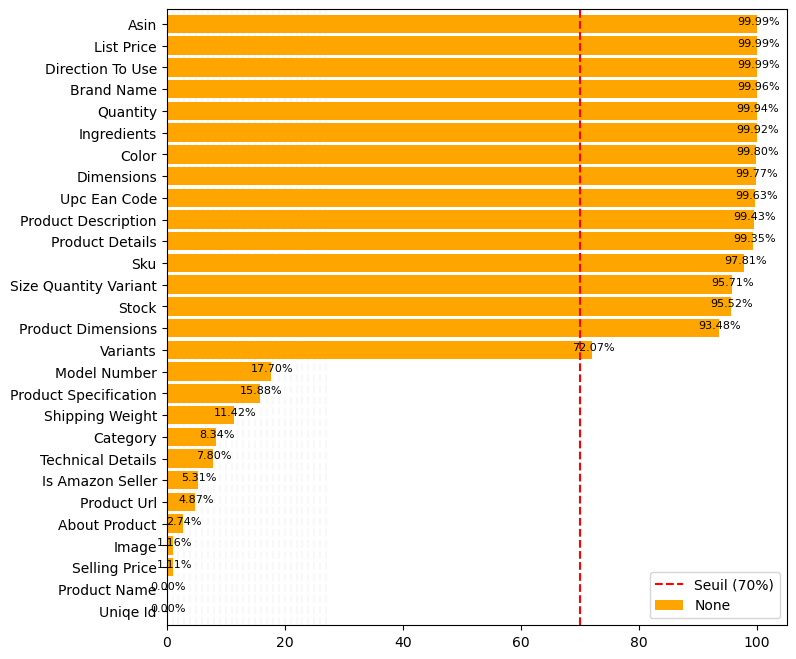

In [28]:
plot_missing_values(products, 70)

In [29]:
products.corr()

""


**Note :**

Ici on vise à nettoyer notre tableau de données (products_cleaned). 
en supprimant les colonnes qui ont beaucoup de valeurs manquantes, c'est-à-dire, plus de 70% de données manquantes. On utilise un seuil (70% dans ce cas) pour décider quelles colonnes supprimer. Après cette opération, les premières lignes du tableau de données nettoyé sont affichées pour voir les résultats. Cela nous aide à éliminer des informations inutiles et à rendre notre tableau de données plus adapté à l'analyse.

In [30]:
products_cleaned = products.copy()  # Pour éviter de modifier le dataframe original

In [31]:
# Supprimer les colonnes qui ont une proportion élevée de valeurs manquantes
seuil_proportion_manquante = 0.7  # ajustez le seuil selon vos besoins
colonnes_manquantes = products_cleaned.columns[products_cleaned.isnull().mean() > seuil_proportion_manquante]
products_cleaned = products_cleaned.drop(columns=colonnes_manquantes)

# Afficher les premières lignes du DataFrame après suppression des colonnes avec des valeurs manquantes élevées
print("\nAprès Suppression des Colonnes avec Valeurs Manquantes Élevées :")
display(products_cleaned.head(3))


Après Suppression des Colonnes avec Valeurs Manquantes Élevées :


,Uniqe Id,Product Name,Category,Selling Price,Model Number,About Product,Product Specification,Technical Details,Shipping Weight,Image,Product Url,Is Amazon Seller
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",Sports & Outdoors | Outdoor Recreation | Skate...,$237.68,NaN,Make sure this fits by entering your model num...,Shipping Weight: 10.7 pounds (View shipping ra...,NaN,10.7 pounds,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/DB-Longboards-CoreFlex-...,Y
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",Toys & Games | Learning & Education | Science ...,$99.95,55324,Make sure this fits by entering your model num...,Product Dimensions: 14.7 x 11.1 x 10.2...,4.06 pounds |Shipping Weight: 4 pounds (Vi...,The snap circuits mini kits classpack provides...,14.7 x 11.1 x 10.2 inches 4.06 pounds,NaN,NaN
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,Toys & Games | Arts & Crafts | Craft Kits,$34.99,NaN,Make sure this fits by entering your model num...,ProductDimensions:10.3x3.4x0.8inches|ItemWeigh...,show up to 2 reviews by default No longer are ...,12.8 ounces,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/3Doodler-Plastic-Innova...,Y


**Suite :**

Ici, nous traitons les valeurs manquantes dans la colonne des prix de vente (Selling Price) en créant une nouvelle colonne pour stocker la devise, en retirant les symboles de devise, en remplaçant les valeurs manquantes par la moyenne, et en arrondissant les résultats à deux chiffres après la virgule dans le tableau de données.


In [32]:
# Créez une nouvelle colonne pour stocker la devise
products_cleaned['Currency'] = products_cleaned['Selling Price'].str.extract('([^\d.,]+)')

# Supprimez le symbole de devise de 'Selling Price' et convertissez-le en nombre
products_cleaned['Selling Price'] = pd.to_numeric(products_cleaned['Selling Price'].replace('[\$,]', '', regex=True), errors='coerce')

# Remplacer les valeurs manquantes dans 'Selling Price' par la moyenne
mean_selling_price = products_cleaned['Selling Price'].mean()
products_cleaned['Selling Price'].fillna(mean_selling_price, inplace=True)

# Arrondir à deux chiffres après la virgule
products_cleaned['Selling Price'] = products_cleaned['Selling Price'].round(2)


# Afficher les premières lignes du DataFrame après remplacement des valeurs manquantes dans 'Selling Price'
print("\nAprès Remplacement des Valeurs Manquantes dans 'Selling Price' :")
display(products_cleaned.head(3))


Après Remplacement des Valeurs Manquantes dans 'Selling Price' :


,Uniqe Id,Product Name,Category,Selling Price,Model Number,About Product,Product Specification,Technical Details,Shipping Weight,Image,Product Url,Is Amazon Seller,Currency
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",Sports & Outdoors | Outdoor Recreation | Skate...,237.68,NaN,Make sure this fits by entering your model num...,Shipping Weight: 10.7 pounds (View shipping ra...,NaN,10.7 pounds,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/DB-Longboards-CoreFlex-...,Y,$
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",Toys & Games | Learning & Education | Science ...,99.95,55324,Make sure this fits by entering your model num...,Product Dimensions: 14.7 x 11.1 x 10.2...,4.06 pounds |Shipping Weight: 4 pounds (Vi...,The snap circuits mini kits classpack provides...,14.7 x 11.1 x 10.2 inches 4.06 pounds,NaN,NaN,$
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,Toys & Games | Arts & Crafts | Craft Kits,34.99,NaN,Make sure this fits by entering your model num...,ProductDimensions:10.3x3.4x0.8inches|ItemWeigh...,show up to 2 reviews by default No longer are ...,12.8 ounces,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/3Doodler-Plastic-Innova...,Y,$


**Suite :**

Ici, nous gérons les valeurs manquantes dans les variables catégorielles en utilisant une approche de remplacement. Pour chaque colonne catégorielle, nous remplaçons les valeurs manquantes par 'Unknown', assurant ainsi que ces données manquantes sont traitées de manière uniforme. Les premières lignes du tableau de données sont ensuite affichées après cette opération.

In [33]:
# Variables catégorielles
categorical_variables = products_cleaned.select_dtypes(include='object').columns.tolist()

print("Categorical Variables :")
print(categorical_variables)

Categorical Variables :
['Uniqe Id', 'Product Name', 'Category', 'Model Number', 'About Product', 'Product Specification', 'Technical Details', 'Shipping Weight', 'Image', 'Product Url', 'Is Amazon Seller', 'Currency']


In [34]:
# Traiter les valeurs manquantes pour les variables catégorielles
categorical_columns = categorical_variables
for column in categorical_columns:
    products_cleaned[column].fillna('Unknown', inplace=True)
    
print("\nAprès Remplacement des Valeurs Manquantes dans d'Autres Colonnes :")
display(products_cleaned.head(3))


Après Remplacement des Valeurs Manquantes dans d'Autres Colonnes :


,Uniqe Id,Product Name,Category,Selling Price,Model Number,About Product,Product Specification,Technical Details,Shipping Weight,Image,Product Url,Is Amazon Seller,Currency
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",Sports & Outdoors | Outdoor Recreation | Skate...,237.68,Unknown,Make sure this fits by entering your model num...,Shipping Weight: 10.7 pounds (View shipping ra...,Unknown,10.7 pounds,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/DB-Longboards-CoreFlex-...,Y,$
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",Toys & Games | Learning & Education | Science ...,99.95,55324,Make sure this fits by entering your model num...,Product Dimensions: 14.7 x 11.1 x 10.2...,4.06 pounds |Shipping Weight: 4 pounds (Vi...,The snap circuits mini kits classpack provides...,14.7 x 11.1 x 10.2 inches 4.06 pounds,Unknown,Unknown,$
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,Toys & Games | Arts & Crafts | Craft Kits,34.99,Unknown,Make sure this fits by entering your model num...,ProductDimensions:10.3x3.4x0.8inches|ItemWeigh...,show up to 2 reviews by default No longer are ...,12.8 ounces,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/3Doodler-Plastic-Innova...,Y,$


**Suite :**

Maintenant, on va s'intéresser à la catégorie le format n'est pas très adapter pour une analyse, essayons de splitter de manière à avoir une catégorie et des sous catégories

In [35]:
Categories = products_cleaned['Category']

# Split 'Category' into 'Category' and 'Sub-Category'
products_cleaned['Category'] = Categories.apply(lambda x: x.split('|')[0].strip() if pd.notnull(x) else x)
products_cleaned['Sub Category'] = Categories.apply(lambda x: x.split('|')[-1].strip() if pd.notnull(x) else x)

# Display the unique categories and sub-categories
print("\nUnique Categories After Splitting:")
print(products_cleaned['Category'].unique())

print("\nUnique Sub-Categories After Splitting:")
#print(products_cleaned['Sub Category'].unique())


Unique Categories After Splitting:
['Sports & Outdoors' 'Toys & Games' 'Unknown' 'Clothing, Shoes & Jewelry'
 'Home & Kitchen' 'Baby Products' 'Pet Supplies' 'Arts, Crafts & Sewing'
 'Electronics' 'Video Games' 'Patio, Lawn & Garden'
 'Tools & Home Improvement' 'Office Products' 'Grocery & Gourmet Food'
 'Remote & App Controlled Vehicle Parts' 'Health & Household'
 'Industrial & Scientific' 'Beauty & Personal Care' 'Hobbies'
 'Remote & App Controlled Vehicles & Parts' 'Automotive'
 'Musical Instruments' 'Movies & TV' 'Cell Phones & Accessories']

Unique Sub-Categories After Splitting:


**Suite :**

La colonne "Poids d'expédition" semble avoir différents formats, comprenant à la fois des poids numériques et du texte plus descriptif. 
Pour normaliser cette colonne et la rendre plus adaptée à l'analyse, vous pouvez extraire les valeurs numériques et les convertir en une unité cohérente, telle que la livre.

**Note :**

lsb => longest side of the package : le côté le plus long de l'emballage
1 lbs = 0.453 kg; 2 lbs = 0.907 kg; 3 lbs = 1.361 kg ...

*re.findall()*: Cette fonction fait partie du module d'expressions régulières (regex) de Python. Elle recherche toutes les occurrences d'un motif spécifié (regex) dans une chaîne donnée et renvoie une liste de toutes les correspondances.

*r'\d+\d+|\d+'*:Il s'agit du modèle de regex utilisé pour faire correspondre les valeurs numériques. 

Décomposons-le :

- \d+ : Ceci correspond à un ou plusieurs chiffres (0-9).
- \. : Il s'agit d'un point littéral (point). Le point étant un caractère spécial dans les expressions rationnelles, il doit être échappé par une barre oblique inverse \N pour être traité comme un point littéral.
- \d+ : Ce caractère correspond à nouveau à un ou plusieurs chiffres.
- | : Il s'agit de l'opérateur OR de la regex, qui permet de faire correspondre soit le motif qui le précède, soit celui qui le suit.

Ainsi, le motif entier \d+\.\d+|\d+ correspond soit à un nombre décimal (avec un point), soit à un nombre entier.

*str(weight)* : Cette fonction convertit la variable poids en chaîne de caractères. Cela permet de s'assurer que le motif de la regex est appliqué à une représentation sous forme de chaîne de caractères des données.

Le résultat est une liste de valeurs numériques trouvées dans la représentation sous forme de chaîne de caractères du poids de l'expédition.

In [36]:
import re #(regular expressions)
shipping_weight = products_cleaned['Shipping Weight']

# Function to extract numeric values from the 'Shipping Weight' column
def extract_numeric_weight(weight):
    # Regular expression to find numeric values
    numeric_values = re.findall(r'\d+\.\d+|\d+', str(weight))
    
    # Convert the values to floats and sum them up
    total_weight = sum([float(value) for value in numeric_values])
    
    return total_weight

# Apply the function to the 'Shipping Weight' column
products_cleaned['Shipping Weight (lbs)'] = shipping_weight.apply(extract_numeric_weight)

# Display the updated DataFrame
display(products_cleaned[['Shipping Weight', 'Shipping Weight (lbs)']].head())


,Shipping Weight,Shipping Weight (lbs)
0,10.7 pounds,10.7
1,The snap circuits mini kits classpack provides...,13.0
2,12.8 ounces,12.8
3,13.4 ounces,13.4
4,complete puzzle measures 14 x 19 in. | 13.4 o...,46.4


**Suite :**

La colonne 'Spécification du Produit' semble contenir des informations sur les dimensions du produit, mais elles sont actuellement dans un format mixte. Pour rendre ces informations plus homogènes et faciles à utiliser dans l'analyse, nous utilisons des expressions régulières pour extraire les dimensions du produit (longueur, largeur, hauteur) de chaque entrée. Ensuite, nous créons trois nouvelles colonnes ('Longueur', 'Largeur', 'Hauteur') dans le tableau de données pour stocker ces dimensions extraites.

In [37]:
# Fonction pour extraire les dimensions du produit (longueur, largeur, hauteur) à partir de la colonne 'Product Specification'
def extract_product_dimensions(specification):
    dimensions_match = re.search(r'(\d+\.\d+|\d+)\s*x\s*(\d+\.\d+|\d+)\s*x\s*(\d+\.\d+|\d+)\s*inches', str(specification))
    if dimensions_match:
        return float(dimensions_match.group(1)), float(dimensions_match.group(2)), float(dimensions_match.group(3))
    else:
        return None, None, None

# Fonction pour extraire le poids de l'article à partir de la colonne 'Product Specification'
def extract_item_weight(specification):
    weight_match = re.search(r'ItemWeight:\s*(\d+\.\d+|\d+)\s*ounces', str(specification))
    if weight_match:
        return float(weight_match.group(1))
    else:
        return None

# Application des fonctions d'extraction aux colonnes appropriées
products_cleaned[['Length', 'Width', 'Height']] = products_cleaned['Product Specification'].apply(extract_product_dimensions).apply(pd.Series)
products_cleaned['Item Weight (oz)'] = products_cleaned['Product Specification'].apply(extract_item_weight)

# Affichage du DataFrame mis à jour
display(products_cleaned[['Length', 'Width', 'Height', 'Item Weight (oz)']].head())


,Length,Width,Height,Item Weight (oz)
0,NaN,NaN,NaN,NaN
1,14.7,11.1,10.2,NaN
2,10.3,3.4,0.8,12.8
3,3.5,6.2,13.0,13.4
4,1.9,8.0,10.0,13.4


In [38]:
# Supprimer les colonnes dont nous n'avons plus besoin
columns_to_drop = ['Shipping Weight', 'Product Specification', 'About Product', 'Technical Details', 'Item Weight (oz)', 'Currency']

products_cleaned.drop(columns=columns_to_drop, inplace=True)

# Après cela on doit supprimer les lignes qui comportent encore des valeurs manquantes, il ne devrait pas en rester beaucoup :
products_cleaned = products_cleaned.dropna()

display(products_cleaned.head(3))

,Uniqe Id,Product Name,Category,Selling Price,Model Number,Image,Product Url,Is Amazon Seller,Sub Category,Shipping Weight (lbs),Length,Width,Height
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",Toys & Games,99.95,55324,14.7 x 11.1 x 10.2 inches 4.06 pounds,Unknown,Unknown,Science Kits & Toys,13.0,14.7,11.1,10.2
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,Toys & Games,34.99,Unknown,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/3Doodler-Plastic-Innova...,Y,Craft Kits,12.8,10.3,3.4,0.8
3,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,Toys & Games,28.91,142,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Guillow-Airplane-Design...,Y,Airplane & Jet Kits,13.4,3.5,6.2,13.0


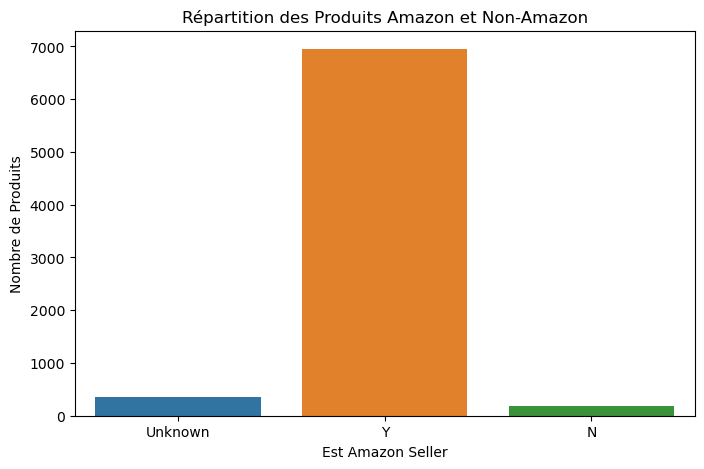

In [39]:
plt.figure(figsize=(8, 5))
sn.countplot(data=products_cleaned, x='Is Amazon Seller')
plt.title('Répartition des Produits Amazon et Non-Amazon')
plt.xlabel('Est Amazon Seller')
plt.ylabel('Nombre de Produits')
plt.show()

Ce diagramme à barres montre le nombre de produits vendus par des vendeurs Amazon et non-Amazon. Il offre une perspective sur la répartition des produits entre ces deux catégories. Cela peut être crucial pour comprendre la diversité des sources de produits dans le jeu de données. Un déséquilibre significatif pourrait indiquer une forte présence d'Amazon comme vendeur.

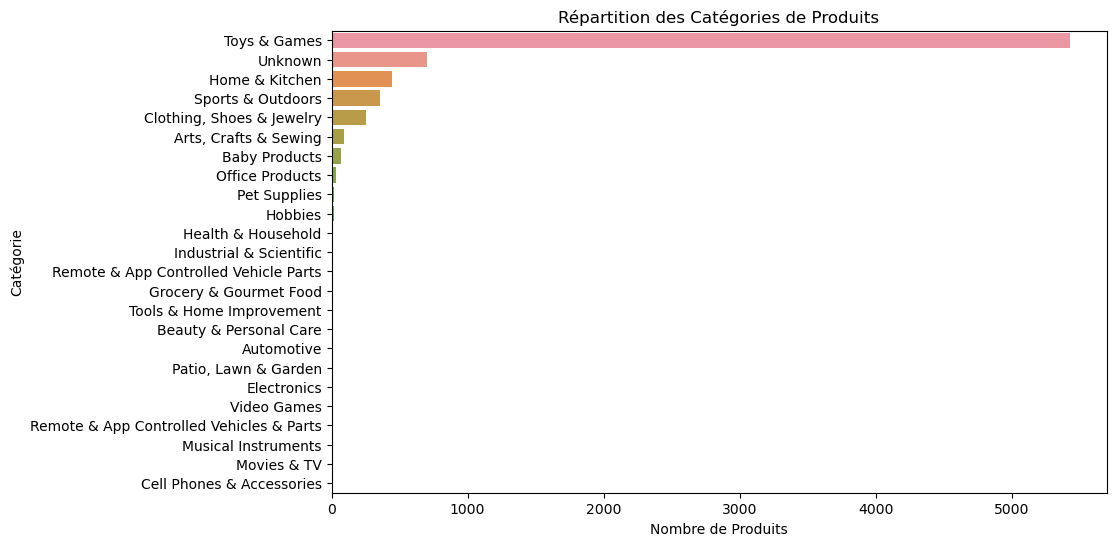

In [40]:
plt.figure(figsize=(10, 6))
sn.countplot(data=products_cleaned, y='Category', order=products_cleaned['Category'].value_counts().index)
plt.title('Répartition des Catégories de Produits')
plt.xlabel('Nombre de Produits')
plt.ylabel('Catégorie')
plt.show()

Ce diagramme à barres présente le nombre de produits dans chaque catégorie. Les barres horizontales fournissent un moyen rapide d'évaluer la diversité des catégories de produits. Des catégories avec un nombre élevé de produits peuvent être des domaines clés d'intérêt, tandis que des catégories moins représentées pourraient nécessiter une exploration plus approfondie.

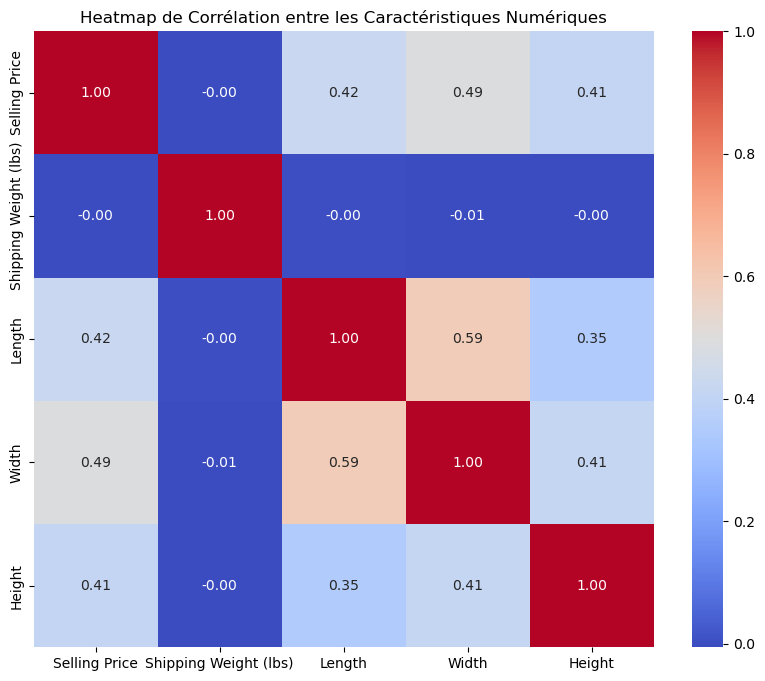

In [41]:
correlation_matrix = products_cleaned[['Selling Price', 'Shipping Weight (lbs)', 'Length', 'Width', 'Height']].corr()
plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Corrélation entre les Caractéristiques Numériques')
plt.show()

Cette heatmap aide à visualiser la corrélation entre les caractéristiques numériques. 
Une corrélation proche de 1 indique une forte relation positive, tandis qu'une corrélation proche de -1 indique une forte relation négative.
Ici on peut remarquer que le poids et la taille sont un peu dependant l'un de l'autre

# V. Intégration des données

**Fusion des Activités et des Clients :**

- Les DataFrames customers_cleaned (contenant des informations sur les clients) et activites_cleaned (contenant des informations sur les activités) sont fusionnés sur la colonne 'Customer ID' du premier DataFrame (customers_cleaned) et la colonne 'user id' du deuxième DataFrame (activites_cleaned).
- La fusion se fait de manière interne (how='inner'), ne conservant que les lignes avec des correspondances dans les deux DataFrames.

**Fusion du Client avec les Données Précédemment Fusionnées :**

- Le DataFrame résultant de la fusion des clients et des activités (customer_activities) est fusionné avec le DataFrame products_cleaned (contenant des informations sur les produits recommandés) sur la colonne 'product id' du DataFrame customer_activities et la colonne 'Uniqe Id' du DataFrame products_cleaned.
- Encore une fois, la fusion est de type interne (how='inner'), préservant uniquement les lignes avec des correspondances dans les deux DataFrames.

In [42]:
# Fusionner les postions et les locations des clients
customer_localised = pd.merge(customers_cleaned, locations, left_on='Location', right_on='Location', how='inner')
# Fusionner les activités et les clients
customer_activities = pd.merge(customer_localised, activites_cleaned, left_on='Customer ID', right_on='user id', how='inner')
# Fusionner le client avec les données précédemment fusionnées
recommendation_data = pd.merge(customer_activities, products_cleaned, left_on='product id', right_on='Uniqe Id', how='inner')


In [43]:
recommendation_data.rename(columns={'Category_x': 'product_category', 'Category_y': 'customer_category'}, inplace=True)
columns_to_drop = ['Uniqe Id', 'user id']
recommendation_data.drop(columns=columns_to_drop, inplace=True)

# Display the final merged data for verification
display(recommendation_data.head(3))


,Customer ID,Age,Gender,Item Purchased,product_category,Purchase Amount (USD),Location,Size,Color,Season,...,Selling Price,Model Number,Image,Product Url,Is Amazon Seller,Sub Category,Shipping Weight (lbs),Length,Width,Height
0,28,56,Male,Shorts,Clothing,56,Kentucky,L,Cyan,Summer,...,34.27,193,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Industro-Stainless-Stee...,Y,Kids' Room Décor,1.37,2.0,0.6,2.0
1,45,39,Male,Hat,Accessories,53,Kentucky,S,Silver,Summer,...,35.00,1AWL/05100/0005/RET,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Disneys-Wonderland-Hatt...,Y,Throws,1.64,60.0,48.0,0.1
2,131,44,Male,Scarf,Accessories,39,Kentucky,L,Violet,Fall,...,19.99,CT1680-2T,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Craft-tastic-Kindness-C...,Y,Craft Kits,9.00,2.0,10.0,10.0


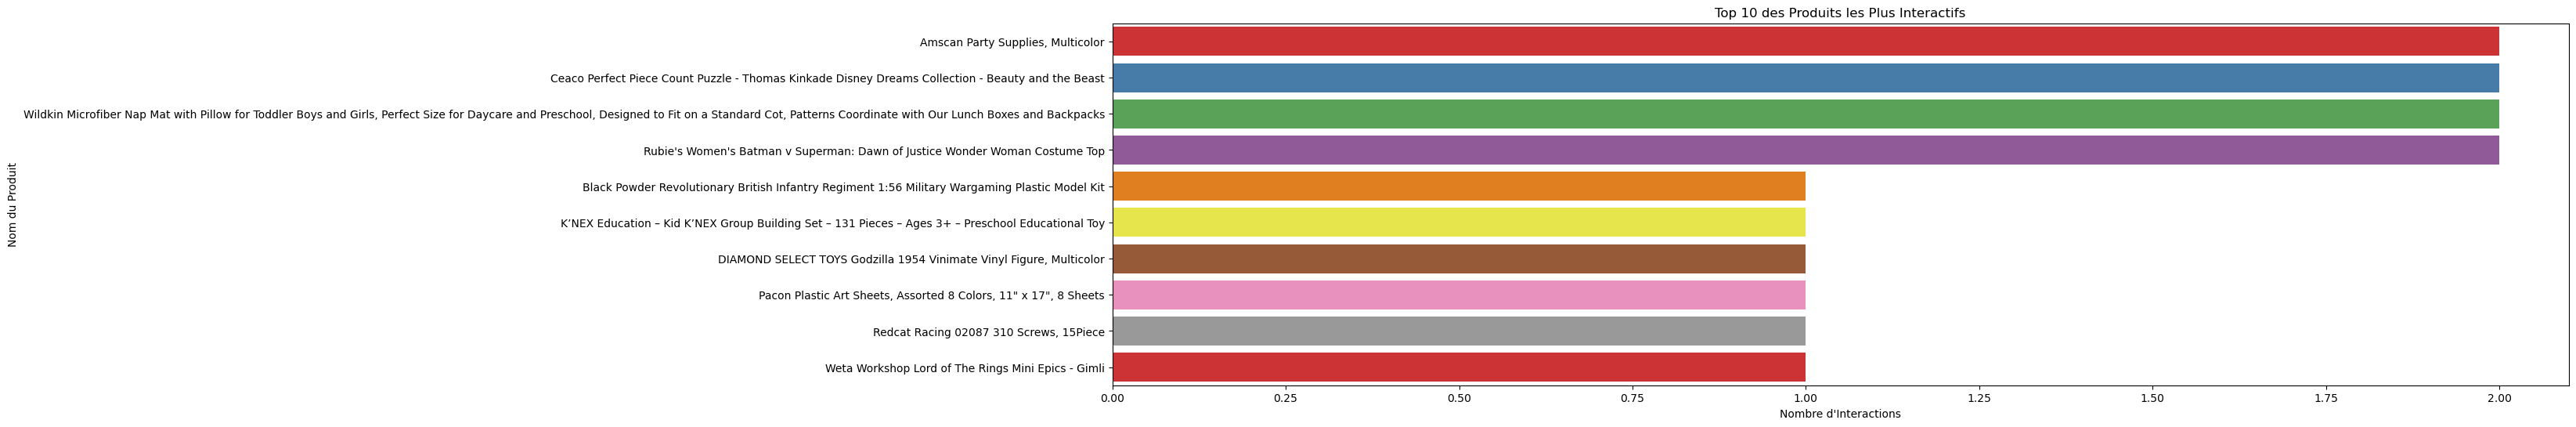

In [44]:
plt.figure(figsize=(24, 6))
top_products = recommendation_data['Product Name'].value_counts().nlargest(10)
sn.barplot(x=top_products.values, y=top_products.index, palette='Set1')
plt.title('Top 10 des Produits les Plus Interactifs')
plt.xlabel('Nombre d\'Interactions')
plt.ylabel('Nom du Produit')
plt.show()

Ce diagramme à barres identifie les 10 produits les plus interactifs, basés sur le nombre total d'interactions qu'ils ont générées.

In [45]:
import os

# Create the "cleaned" directory if it doesn't exist
output_directory = "data/cleaned"
os.makedirs(output_directory, exist_ok=True)

# Save the cleaned DataFrame to a new CSV file
customer_localised.to_csv(os.path.join(output_directory, "customers.csv"), index=False)
products_cleaned.to_csv(os.path.join(output_directory, "products.csv"), index=False)
customer_activities.to_csv(os.path.join(output_directory, "activities.csv"), index=False)
recommendation_data.to_csv(os.path.join(output_directory, "recommendations.csv"), index=False)

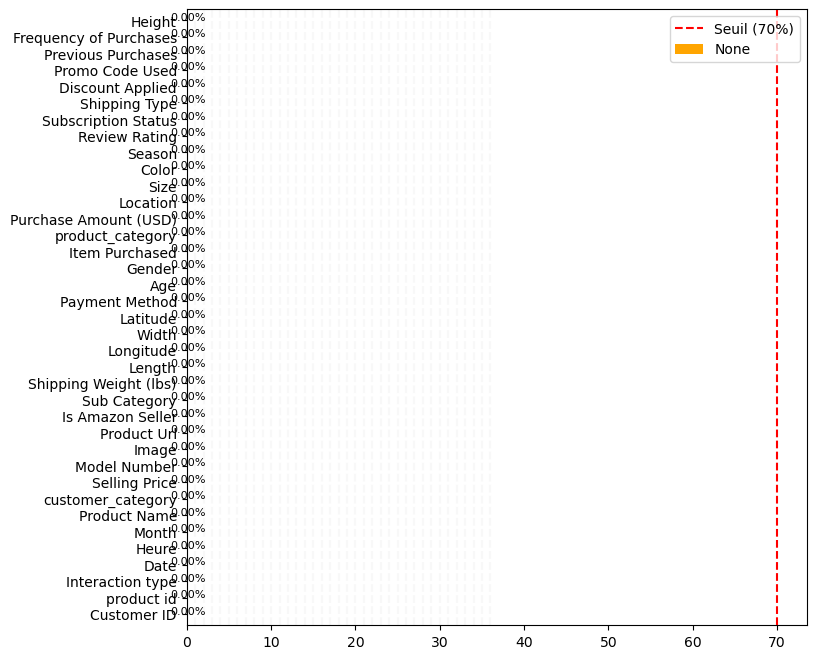

In [46]:
plot_missing_values(recommendation_data, 70)

**Ya t'il des laisions entre variables ?**

Voyons si il existe des laisons entres les colonnes cela nous permettra de prendre que les colonnes importante pour notre prediction

In [47]:
recommendation_data.corr()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Latitude,Longitude,Selling Price,Shipping Weight (lbs),Length,Width,Height
Customer ID,1.000000,-0.015027,0.000863,-0.026894,-0.025921,0.013133,0.018375,0.008265,-0.000389,-0.028506,0.025865,0.026765
Age,-0.015027,1.000000,-0.016186,-0.009508,0.030928,0.009418,0.021214,-0.012161,0.013726,-0.015073,0.014316,0.003451
Purchase Amount (USD),0.000863,-0.016186,1.000000,0.037896,0.002553,0.026449,-0.042701,0.015383,0.031083,0.004974,0.002720,-0.009837
Review Rating,-0.026894,-0.009508,0.037896,1.000000,-0.018735,0.028609,-0.023146,0.001464,0.036723,0.013600,-0.012774,-0.009347
Previous Purchases,-0.025921,0.030928,0.002553,-0.018735,1.000000,-0.009874,-0.044552,-0.036453,0.023740,-0.036729,-0.052990,-0.042965
Latitude,0.013133,0.009418,0.026449,0.028609,-0.009874,1.000000,-0.093383,-0.021556,0.014422,-0.002030,0.005212,0.008090
Longitude,0.018375,0.021214,-0.042701,-0.023146,-0.044552,-0.093383,1.000000,-0.008041,-0.030561,0.026110,0.038673,0.015323
Selling Price,0.008265,-0.012161,0.015383,0.001464,-0.036453,-0.021556,-0.008041,1.000000,-0.003627,0.514447,0.522537,0.320163
Shipping Weight (lbs),-0.000389,0.013726,0.031083,0.036723,0.023740,0.014422,-0.030561,-0.003627,1.000000,-0.000647,-0.010224,-0.003845
Length,-0.028506,-0.015073,0.004974,0.013600,-0.036729,-0.002030,0.026110,0.514447,-0.000647,1.000000,0.718542,0.273076


- Selling Price (Prix de vente) : Il s'agit probablement d'une caractéristique importante car elle indique le coût du produit.

- Shipping Weight (Poids d'expédition en livres) : Le poids d'expédition pourrait être pertinent, surtout si on souhaite tenir compte du poids du produit dans la recommandation.

- Length (Longueur), Width (Largeur), Height (Hauteur) : Ces dimensions pourraient être utiles si la taille ou la forme physique du produit est importante dans notre système de recommandation.

- Purchase Amount (Montant de l'achat en USD) : Cela pourrait être crucial, surtout si on souhaite recommander des produits en fonction des habitudes de dépenses historiques de l'utilisateur.

- Review Rating (Évaluation) : Si l'on souhaite intégrer les évaluations des utilisateurs dans notre recommandation, cela serait essentiel.

- Previous Purchases (Achats précédents) : L'historique des achats précédents de l'utilisateur est souvent une caractéristique précieuse pour les systèmes de recommandation.

Des variables comme Customer ID (Identifiant du client) et Age (Âge) peuvent ne pas contribuer directement à la recommandation, mais elles peuvent être utilisées pour la segmentation des utilisateurs ou la personnalisation.

In [48]:
recommendation_data.var()

/tmp/ipykernel_14857/293552201.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  recommendation_data.var()


Customer ID              7.435727e+05
Age                      2.315818e+02
Purchase Amount (USD)    5.723382e+02
Review Rating            5.177236e-01
Previous Purchases       2.080667e+02
Latitude                 3.801114e+01
Longitude                3.495570e+02
Selling Price            9.399716e+03
Shipping Weight (lbs)    1.799396e+17
Length                   2.863379e+02
Width                    2.584216e+02
Height                   2.728359e+02
dtype: float64

- Selling Price (Prix de vente) : La variance est élevée, ce qui indique une dispersion significative des prix de vente.

- Shipping Weight (Poids d'expédition en livres) : La variance est extrêmement élevée, ce qui suggère une dispersion importante dans les poids d'expédition des produits. Cela pourrait être dû à des différences massives entre les produits légers et lourds.

- Length (Longueur), Width (Largeur), Height (Hauteur) : Les variances pour ces dimensions sont relativement faibles, indiquant une dispersion moindre par rapport à Selling Price ou Shipping Weight. Cela pourrait signifier que ces dimensions sont relativement cohérentes parmi les produits.

- Age (Âge) : La variance est relativement faible, suggérant que l'âge des clients varie moins parmi l'ensemble de données.

- Purchase Amount (Montant de l'achat en USD), Review Rating (Évaluation), Previous Purchases (Achats précédents) : Ces variables ont des variances qui indiquent une dispersion modérée.

**Encodage des variables catégorielles**

In [49]:
# Categorical variables
categorical_variables = recommendation_data.select_dtypes(include='object').columns.tolist()

print("Categorical Variables :")    
print(categorical_variables)

Categorical Variables :
['Gender', 'Item Purchased', 'product_category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases', 'product id', 'Interaction type', 'Heure', 'Month', 'Product Name', 'customer_category', 'Model Number', 'Image', 'Product Url', 'Is Amazon Seller', 'Sub Category']


Colonnes incluses pour l'encodage :

- Interaction type: Si vous souhaitez inclure le type d'interaction dans votre analyse, cela pourrait être important de le représenter numériquement pour certains algorithmes.

- Product Name, product_category, Sub Category, Gender, Item Purchased, customer_category, Location, Size, Color, Season, Subscription Status, Shipping Type, Discount Applied, Promo Code Used, Payment Method, Frequency of Purchases: Ces colonnes contiennent des informations catégorielles qui peuvent avoir une influence sur le comportement des utilisateurs et peuvent être incluses dans une analyse pour détecter des tendances ou des modèles.

Colonnes laissées telles quelles :

- Product Name, Model Number, Image, Product Url: Ces colonnes contiennent des informations spécifiques aux produits qui peuvent ne pas nécessiter d'encodage pour l'analyse générale du comportement des utilisateurs.

- Is Amazon Seller, Shipping Weight (lbs), Length, Width, Height, Customer ID, Age, Review Rating, Previous Purchases: Ces colonnes peuvent être traitées comme des variables continues ou des identifiants uniques, et leur encodage dépendra de la nature de l'analyse que vous souhaitez effectuer.

In [50]:
# Encodage one-hot pour les variables catégorielles
data_encoded = pd.get_dummies(recommendation_data, columns=['Interaction type', 'Gender', 'product_category', 'customer_category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases'], drop_first=True)


In [51]:
data_encoded.to_csv(os.path.join(output_directory, "data_encoded.csv"), index=False)

# VI. Recommandations de produits pour les utilisateurs

## 1. Introduction aux Recommandations de Produits

Dans un marché de plus en plus vaste et diversifié, les systèmes de recommandation de produits jouent un rôle essentiel pour améliorer l'expérience des utilisateurs en leur proposant des suggestions personnalisées. Ce rapport explore le développement et la mise en œuvre d'un tel système, mettant l'accent sur la sélection des caractéristiques, les techniques de recommandation, et la mesure de la performance.

## 2. Sélection des Caractéristiques

La première étape cruciale dans la construction d'un système de recommandation efficace est la sélection des caractéristiques pertinentes. Cela implique la collecte et la préparation de données liées aux achats passés, aux interactions des utilisateurs, et à d'autres informations démographiques. Une base de données propre et bien préparée est essentielle pour des recommandations précises.

## 3. Techniques de Recommandation

- **Filtrage Collaboratif :** 

Ce type d'algorithme exploite les préférences d'un utilisateur en fonction des comportements d'achats ou d'interactions similaires à d'autres utilisateurs.

- **Filtrage Basé sur le Contenu :** 

Ces algorithmes recommandent des produits en fonction des caractéristiques du produit et des préférences passées de l'utilisateur.

- **Approches Hybrides :** 

Combinant les avantages des deux approches précédentes, les approches hybrides cherchent à optimiser la précision des recommandations.

## 4. Mise en Œuvre du Système de Recommandation

- **Sélection des Algorithmes :** 

Selon la nature des données, des algorithmes tels que la factorisation matricielle, les réseaux de neurones, et les méthodes hybrides peuvent être choisis.

- **Entraînement du Modèle :** 

Les modèles sont entraînés sur les données historiques pour apprendre les tendances et les préférences des utilisateurs.

- **Mesures d'Évaluation :** 

Des métriques telles que la précision, le rappel, et le taux de conversion sont utilisées pour évaluer l'efficacité du système.

- **Mesures de Précision :** 

L'exactitude des recommandations est mesurée en fonction de la cohérence entre les préférences prédites et les choix réels des utilisateurs.

- **Mesure de la Satisfaction de l'Utilisateur :** 

Au-delà des métriques techniques, la satisfaction de l'utilisateur est évaluée pour garantir une expérience globale positive.

- **Résultats et Performances :** 

Les résultats des recommandations et les performances du système sont analysés en profondeur.

- **Performance Globale du Système :** 

Une évaluation holistique de la performance du système est effectuée pour assurer sa pertinence et son efficacité globale.

- **Résultats Spécifiques à l'Utilisateur :** 

Des analyses spécifiques sont réalisées pour évaluer la pertinence des recommandations pour des groupes d'utilisateurs particuliers.

## 5. Conclusion

La mise en œuvre réussie d'un système de recommandation de produits nécessite une approche équilibrée entre la sélection judicieuse des caractéristiques, le choix d'algorithmes adaptés, et une évaluation rigoureuse de la performance. Ces systèmes jouent un rôle crucial dans l'amélioration de l'expérience utilisateur, stimulant ainsi l'engagement et la fidélisation.

# VII. Défis et Solutions

## 1. Prétraitement des Données

Les données d'origine comportaient des valeurs manquantes, des incohérences, et des aberrations. Pour remédier à ces problèmes, il a été nécessaire d'utiliser des méthodes de nettoyage et d'imputation afin d'assurer la qualité des données malgré les contraintes de temps.

## 2. Gestion du Court Délai de Mise en Place

Le délai court imposait un défi supplémentaire, surtout en travaillant en solo. Pour y faire face, il a fallu adopter une approche agile, en découpant le projet en itérations courtes et en mettant l'accent sur la priorisation des fonctionnalités essentielles. Cela a permis une mise en œuvre progressive et une adaptation rapide aux éventuels changements.

## 3. Temps de Familiarisation avec les Technologies et les Algorithmes

En tant que seul membre du projet, la familiarisation rapide avec les technologies et les algorithmes était cruciale. Il a fallu des formations préalables, privilégiant l'utilisation de frameworks bien documentés et encourageant la collaboration et le partage des connaissances pour une assimilation rapide des outils et des méthodes employés durant le projet.

# VIII. Améliorations futures

## 1. Intégration de Données Supplémentaires

Pour une vision plus holistique, l'intégration de données supplémentaires provenant de sources externes pourrait enrichir notre analyse. Cela pourrait inclure des données économiques, météorologiques, ou d'autres facteurs externes susceptibles d'influencer le comportement d'achat.

## 2. Développement de Modèles Prédictifs

Les analyses prédictives peuvent apporter une valeur ajoutée en anticipant les tendances d'achat futures. Les améliorations futures incluront le développement de modèles prédictifs avancés, utilisant des algorithmes tels que les réseaux neuronaux et les méthodes d'apprentissage profond.

# IX. Conclusion

En conclusion, cette étude sur le jeu de données E-commerce Sales Data offre des perspectives riches pour comprendre le comportement des utilisateurs dans le domaine du commerce électronique. Malgré les défis rencontrés, les solutions adoptées ont permis de tirer des enseignements significatifs. Les améliorations futures visent à rendre notre analyse encore plus robuste et à anticiper les évolutions du marché du commerce électronique. L'exploitation continue de ces données permettra d'optimiser les stratégies d'entreprise et d'offrir une expérience utilisateur plus personnalisée et engageante.

# X. Références

- Artificial Intelligence with Python Your complete guide to building intelligent apps using Python 3.x and TensorFlow 2 (Alberto Artasanchez Prateek Joshi) (z-lib.org)
- Machine-Learning-Mastery-with-Pyt (Jason-Brownlee)(z-lib.org)
- https://plotly.com/
- https://www.kaggle.com/datasets/ahmedaliraja/e-commerece-sales-data-2023-24/data